### 카드('부산', '코나', '하나') 사용 빈도

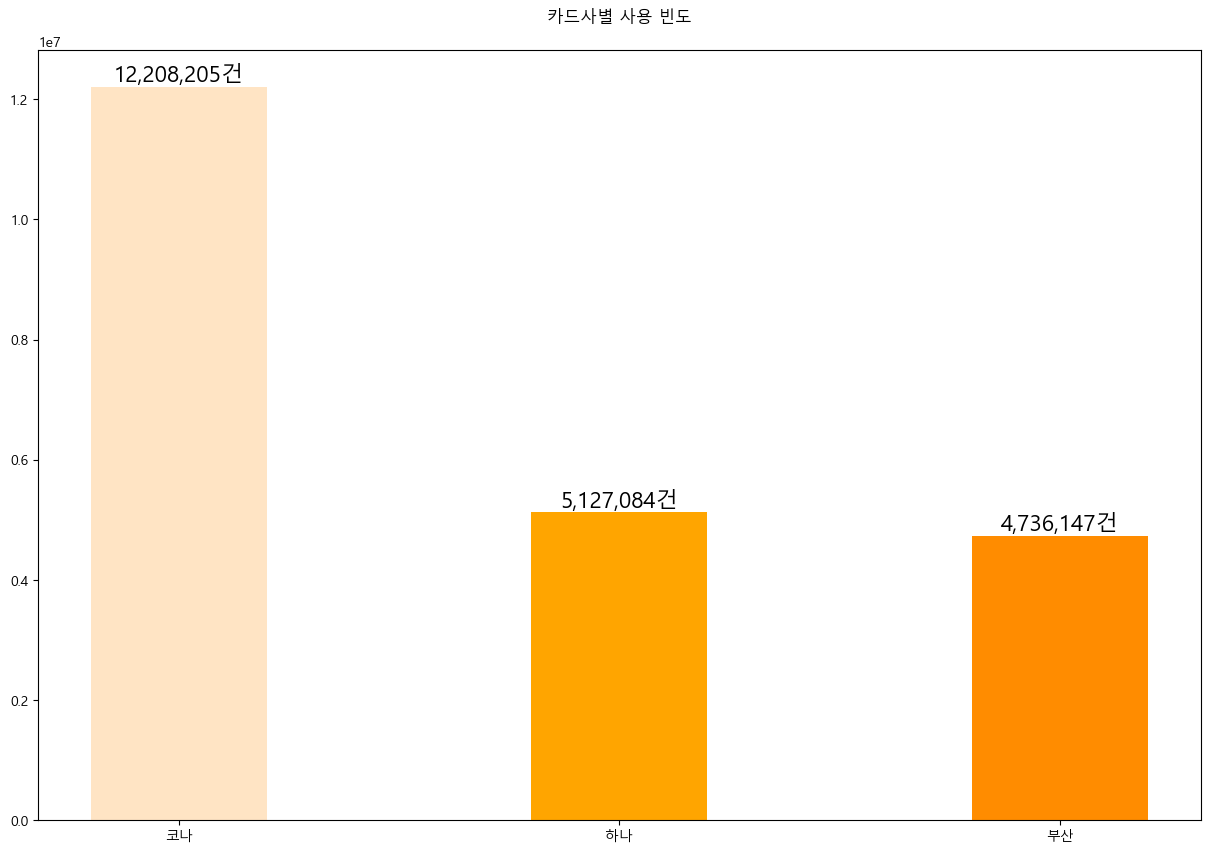

In [8]:
plt.figure(figsize=(15,10))
colors = ['bisque', 'orange', 'darkorange']
bar = plt.bar(df_card.Card, df_card.Card_Cnt, color=colors, width=0.4)
plt.title('카드사별 사용 빈도', pad=20)

# 그래프 값 표시
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '{:,.0f}건'.format(height), ha='center', va='bottom', size = 16)

#plt.show()
plt.savefig('total_card.png')

### 월별 구매 금액, 횟수

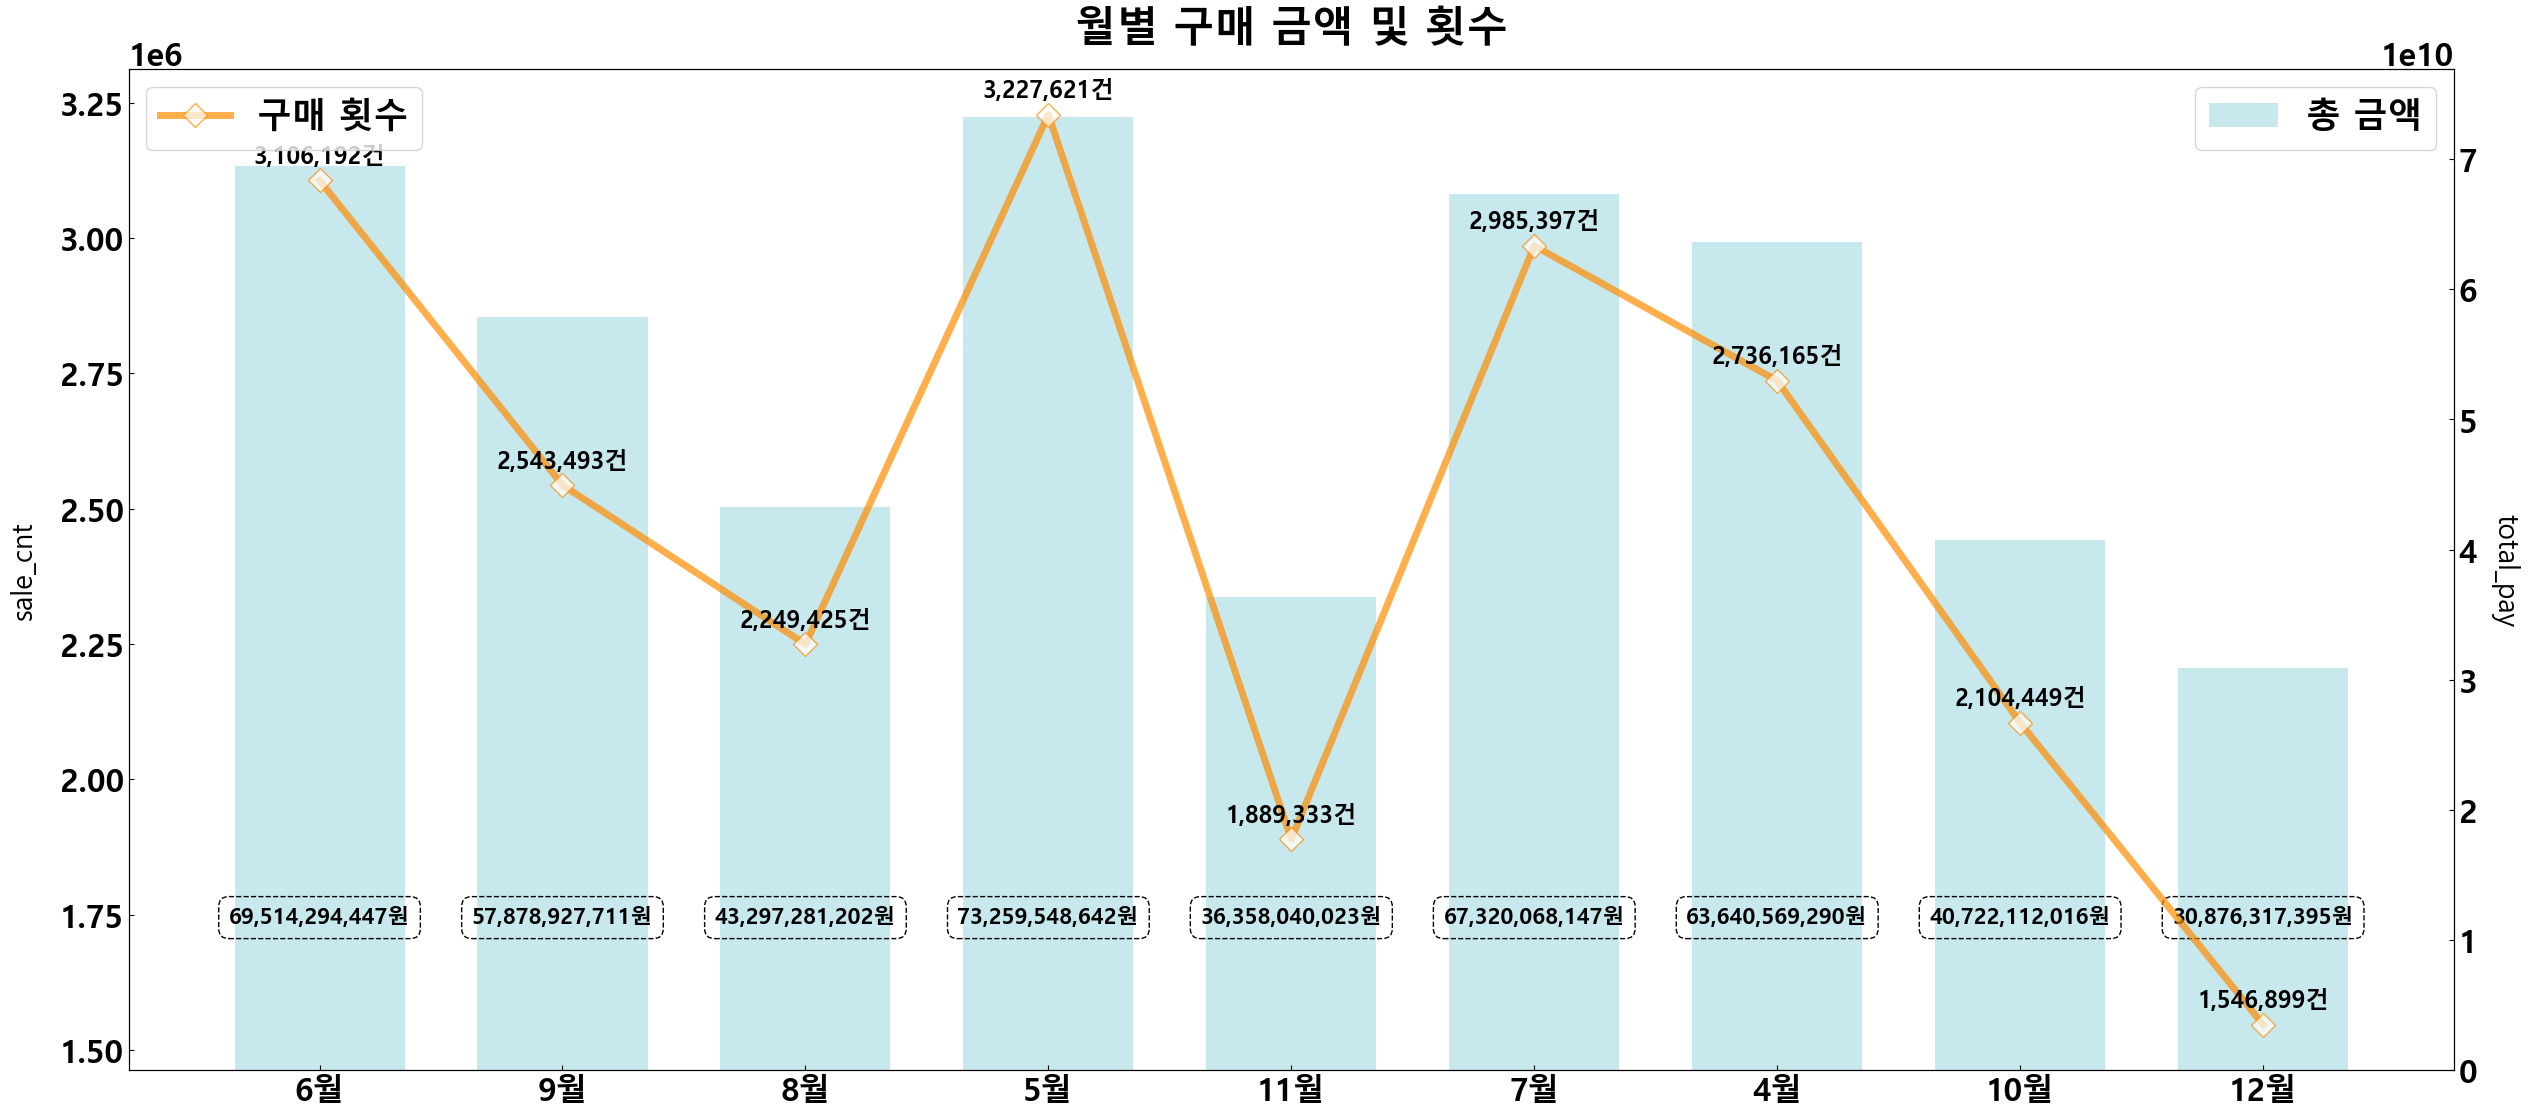

In [10]:
# 바와 꺾은선 그래프를 이중그래프로 사용


# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (30, 13)
plt.rcParams['font.size'] = 23
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.family'] = 'Malgun Gothic'


# 2. 데이터 준비
x = df_month.Month
y1 = df_month.sale_cnt
y2 = df_month.total_pay

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, 'D-', color='darkorange', markersize=12, linewidth=5, alpha=0.7, label='구매 횟수', mfc="w")
#ax1.set_xlabel('Month')
ax1.set_ylabel('sale_cnt', labelpad=15, size=20)
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='powderblue', label='총 금액', alpha=0.7, width=0.7)
ax2.set_ylabel('total_pay', labelpad=30, size=20, rotation = 270)
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left', fontsize=25)
ax2.legend(loc='upper right', fontsize=25)

plt.title('월별 구매 금액 및 횟수', fontsize=30, pad=20)


for i in range(len(x)):
    ax1.text(x[i], y1[i]+20395, '{:,.0f}건'.format(y1[i]), ha='center', va='bottom', fontsize=17)

for i in range(len(x)):
    ax2.text(x[i], 10876317395, '{:,.0f}원'.format(y2[i]), ha='center', va='bottom', fontsize=16, bbox=dict(boxstyle='round,pad=0.45', fc='none', linewidth=1, linestyle='--'))



#plt.show()
plt.savefig('month_pay.png')

### '일반한식', '서양음식', '슈퍼마켓'에서 월 평균, 5월 평균 구매 횟수

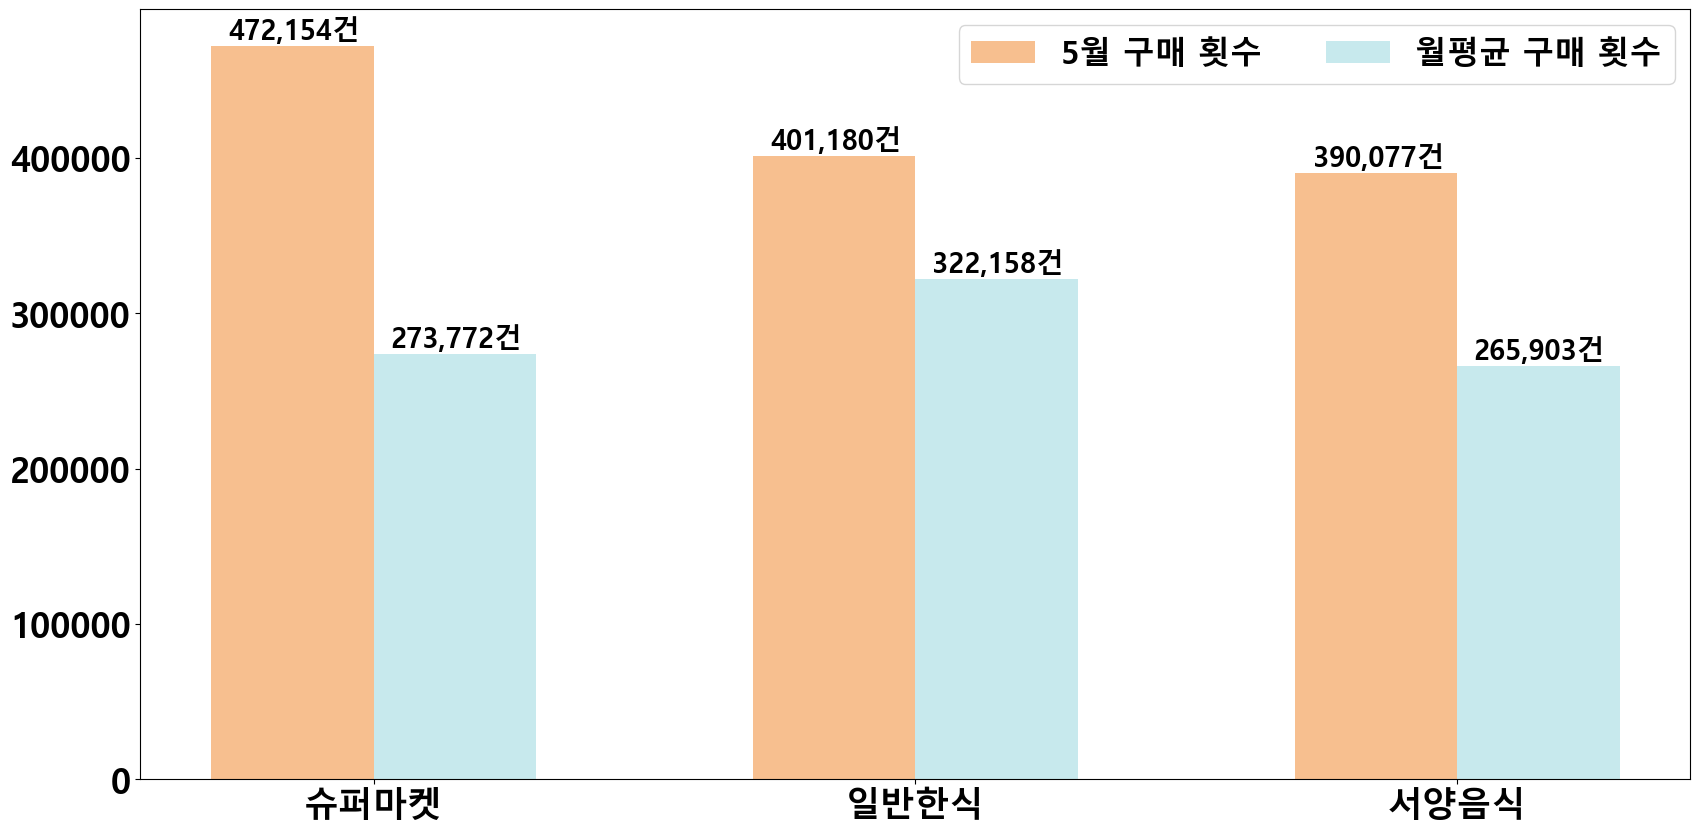

In [14]:
# '일반한식', '서양음식', '슈퍼마켓'가 x좌표를 쪼개서 두개의 그래프를 한번에 표현

plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 25
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.family'] = 'Malgun Gothic'


x = df_total.tpbuz_nm
y1 = df_may.f0_
y2 = df_total.f0_

# x의 고유한 값들 추출
categories = x.unique()

# 고유한 값들에 대응되는 숫자 리스트 생성
x_numeric = range(len(categories))  

bar_width = 0.3  # 막대 그래프의 폭
offset = bar_width / 2  # 막대 그래프의 폭 절반만큼 이동

p1 = plt.bar([val - offset for val in x_numeric], y1, color='sandybrown', alpha=0.7, width=bar_width, label='5월 구매 횟수')
p2 = plt.bar([val + offset for val in x_numeric], y2, color='powderblue', alpha=0.7, width=bar_width, label='월평균 구매 횟수')
plt.legend(ncol=2, fontsize=23)

for i in range(len(x)):
    plt.annotate('{:,.0f}건'.format(y1[i]), xy=(x_numeric[i]-0.3, y1[i]-16000), xytext=(x_numeric[i]-0.025, y1[i] + 1), ha='right', va='bottom', fontsize=20)
    
for i in range(len(x)):
    plt.annotate('{:,.0f}건'.format(y2[i]), xy=(x_numeric[i]+0.064, y2[i]-13000), xytext=(x_numeric[i]+0.03, y2[i] + 1), ha='left', va='bottom', fontsize=20)

plt.xticks(x_numeric, categories)  # 숫자로 변환된 x 좌표에 대응되는 카테고리 레이블 설정
#plt.show()

plt.savefig('may_cnt.png')

### 명지시장만 판매순위 top5

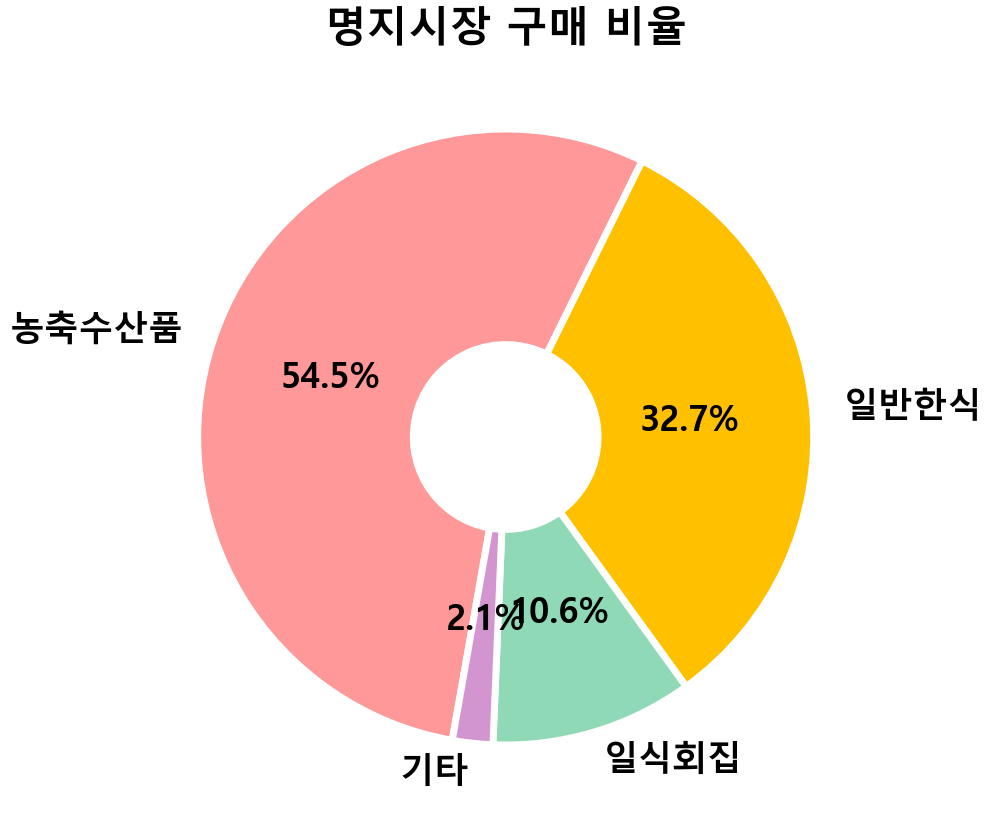

In [22]:
ratio = [186562802,111983900,36351000,7246480]
labels = ['농축수산품', '일반한식', '일식회집', '기타']
explode = [0, 0, 0, 0]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title('명지시장 구매 비율', pad=-100000)

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops, explode=explode)
# plt.show()
plt.savefig('명지시장 구매 비율.png')

### 시장이 위치한 구.군민 및 타 구.군민 이용객 대비 금액

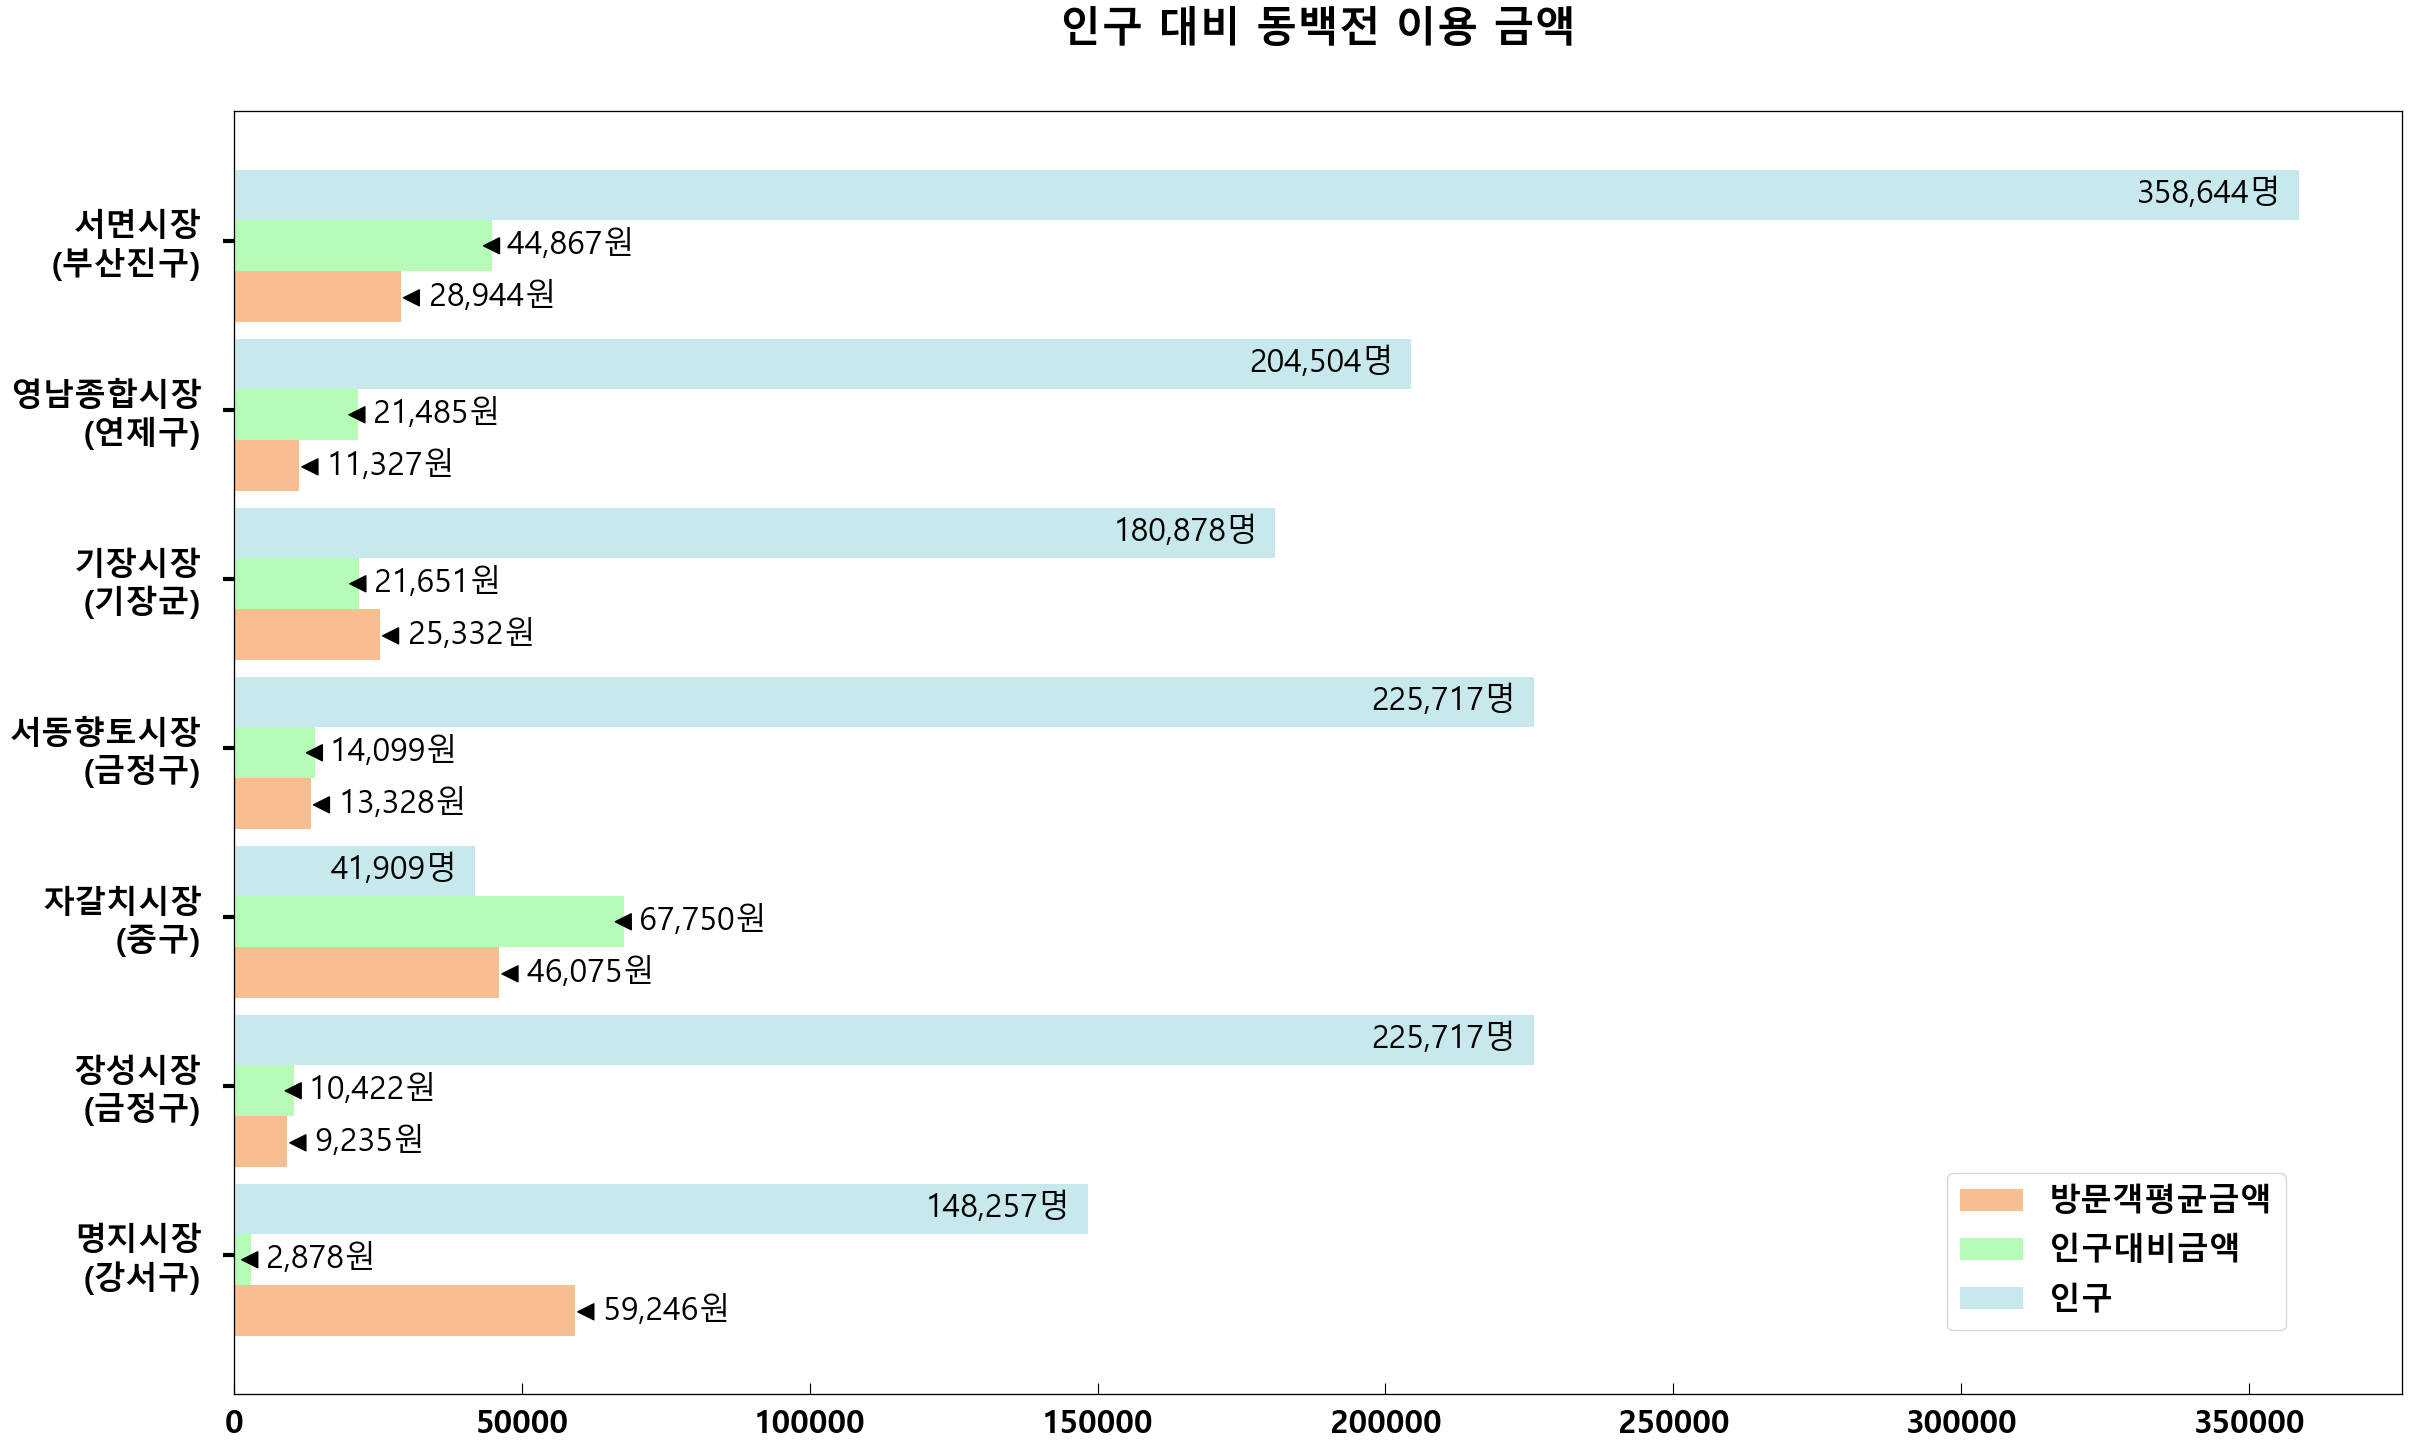

In [46]:
# 1. 기본 스타일 설정

plt.style.use('default')
plt.rcParams['figure.figsize'] = (25, 15)
plt.rcParams['font.size'] = 23
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.family'] = 'Malgun Gothic'


x = df_p_pay['tmkt_nm']
y1 = df_p_pay['방문객평균금액']
y2 = df_p_pay['인구대비금액']
y3 = df_p_pay['population']

categories = x.unique()
bar_height = 0.3
offset = bar_height / 3
y_numeric = np.arange(len(categories)) + offset

fig, ax1 = plt.subplots()  # 첫 번째 축 생성
fig.subplots_adjust(left=0.8)  # 축의 왼쪽 여백 조정
p1 = ax1.barh([val - offset*5 for val in y_numeric], y1, color='sandybrown', alpha=0.7, height=bar_height, label='방문객평균금액')

ax2 = ax1.twiny()  # 두 번째 축 생성
p2 = ax2.barh([val - offset*2 for val in y_numeric], y2, color='palegreen', alpha=0.7, height=bar_height, label='인구대비금액')

ax3 = ax1.twiny()  # 세 번째 축 생성
p3 = ax3.barh([val + offset for val in y_numeric], y3, color='powderblue', alpha=0.7, height=bar_height, label='인구')

# x축 스케일 설정
ax1.set_xlim(ax3.get_xlim())
ax2.set_xlim(ax3.get_xlim())

# 눈금 설정
ax1.tick_params(axis='y', left=True, labelleft=True, width=3, length=8)
ax1.tick_params(axis='x', top =False, bottom=True, labelbottom=True, labeltop=False, direction='in', length=8)# 첫 번째 축의 y 눈금 레이블 제거
ax2.tick_params(axis='x', top =False,bottom=False, labelbottom=False, labeltop=False)  # 두 번째 축의 x 눈금 레이블 제거
ax3.tick_params(axis='x', top =False,bottom=False, labelbottom=False, labeltop=False)  # 세 번째 축의 x 눈금 레이블 제거

# 범례 설정
handles = handles1 + handles2 + handles3
labels = labels1 + labels2 + labels3
ax1.legend(handles, labels, loc=(0.79, 0.05), ncol=1, fontsize=23, frameon=True)

# 범례 항목에 대한 선 굵기 설정
for line in ax1.get_legend().get_lines():
    line.set_linewidth(2)  # 선 굵기 조정

for i in range(len(x)):
    ax1.annotate(' {:,.0f}원'.format(y1[i]), xy=(y1[i], y_numeric[i]-0.508), xytext=(y1[i]+3000, y_numeric[i]-0.508), ha='left', va='center', fontweight=500, arrowprops=dict(arrowstyle='simple', facecolor='black'))

for i in range(len(x)):
    ax2.annotate(' {:,.0f}원'.format(y2[i]), xy=(y2[i]-2000, y_numeric[i]-0.2), xytext=(y2[i]+700, y_numeric[i]-0.2), ha='left', va='center', fontweight='medium', arrowprops=dict(arrowstyle='simple', facecolor='black'))

for i in range(len(x)):
    ax3.annotate('{:,.0f}명'.format(y3[i]), xy=(y3[i], y_numeric[i]), xytext=(y3[i]-3000, y_numeric[i]+0.1), ha='right', va='center', fontweight='medium')

plt.title('인구 대비 동백전 이용 금액', pad=50, fontsize=30)
ax1.set_yticks(y_numeric-0.17, categories)
ax1.set_yticklabels(categories, fontsize=23, fontweight='bold')

# Adjust the position of the y-axis tick labels
ax1.tick_params(axis='y', pad=15)
ax1.tick_params(axis='x', pad=10)

# Adjust figure layout
fig.tight_layout()

# Alternatively, you can try increasing the left margin of the plot
fig.subplots_adjust(left=0.3)


plt.tight_layout()  # 그래프들 간의 간격 조정
plt.show()


### 연령대별 동백전 사용현황

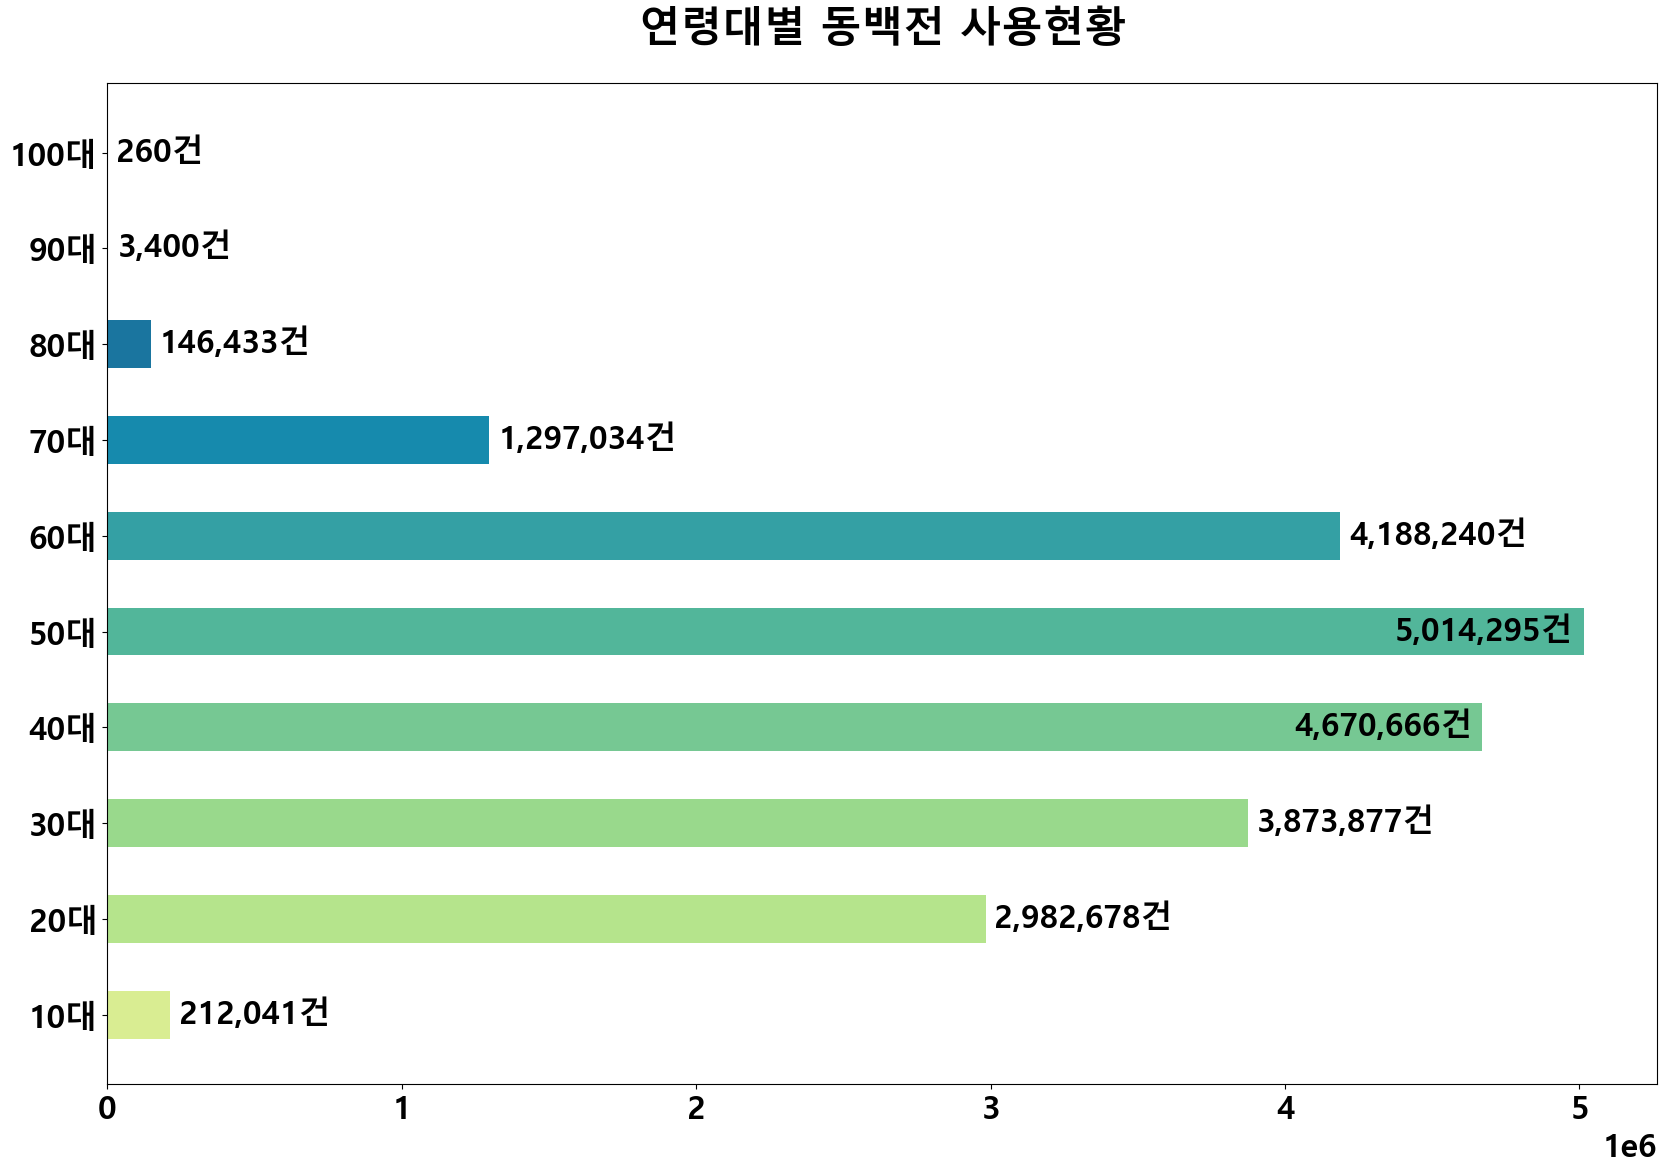

In [47]:
age_group = df_age_group['age_group']
values = df_age_group['cnt']
colors = ['#d9ed92', '#b5e48c', '#99d98c', '#76c893', '#52b69a', '#34a0a4', '#168aad', '#1a759f', '#1e6091', '#184e77']


categories = age_group.unique()  # x의 고유한 값들 추출
y_numeric = np.arange(len(categories))  # 고유한 값들에 대응되는 숫자 리스트 생성

fig, ax = plt.subplots(figsize=(20, 13))
ax.barh(y_numeric, values, height=0.5, color=colors)
ax.set_yticks(y_numeric)
ax.set_yticklabels(categories)

# 값 표시
for i in range(len(age_group)):
    if i == 4 or i == 3:
        plt.annotate('{:,.0f}건'.format(values[i]), xy=(values[i]-10000, y_numeric[i]), xytext=(values[i]-35000, y_numeric[i]), ha='right', va='center')
    else:    
        plt.annotate('{:,.0f}건'.format(values[i]), xy=(values[i]+10000, y_numeric[i]), xytext=(values[i]+30000, y_numeric[i]), ha='left', va='center')
        
ax1.tick_params(axis='x', pad=10)
plt.title('연령대별 동백전 사용현황', pad = 30, fontsize=30)

plt.show()

### 시장 이용 연령대 데이터프레임

<>:14: SyntaxWarning: invalid decimal literal
<>:14: SyntaxWarning: invalid decimal literal
C:\Users\USER\AppData\Local\Temp\ipykernel_11376\1146827401.py:14: SyntaxWarning: invalid decimal literal
  p2 = plt.bar([val + offset*2for val in x_numeric], y2, color='#f94144', alpha=0.7, width=bar_width, label='전통시장')


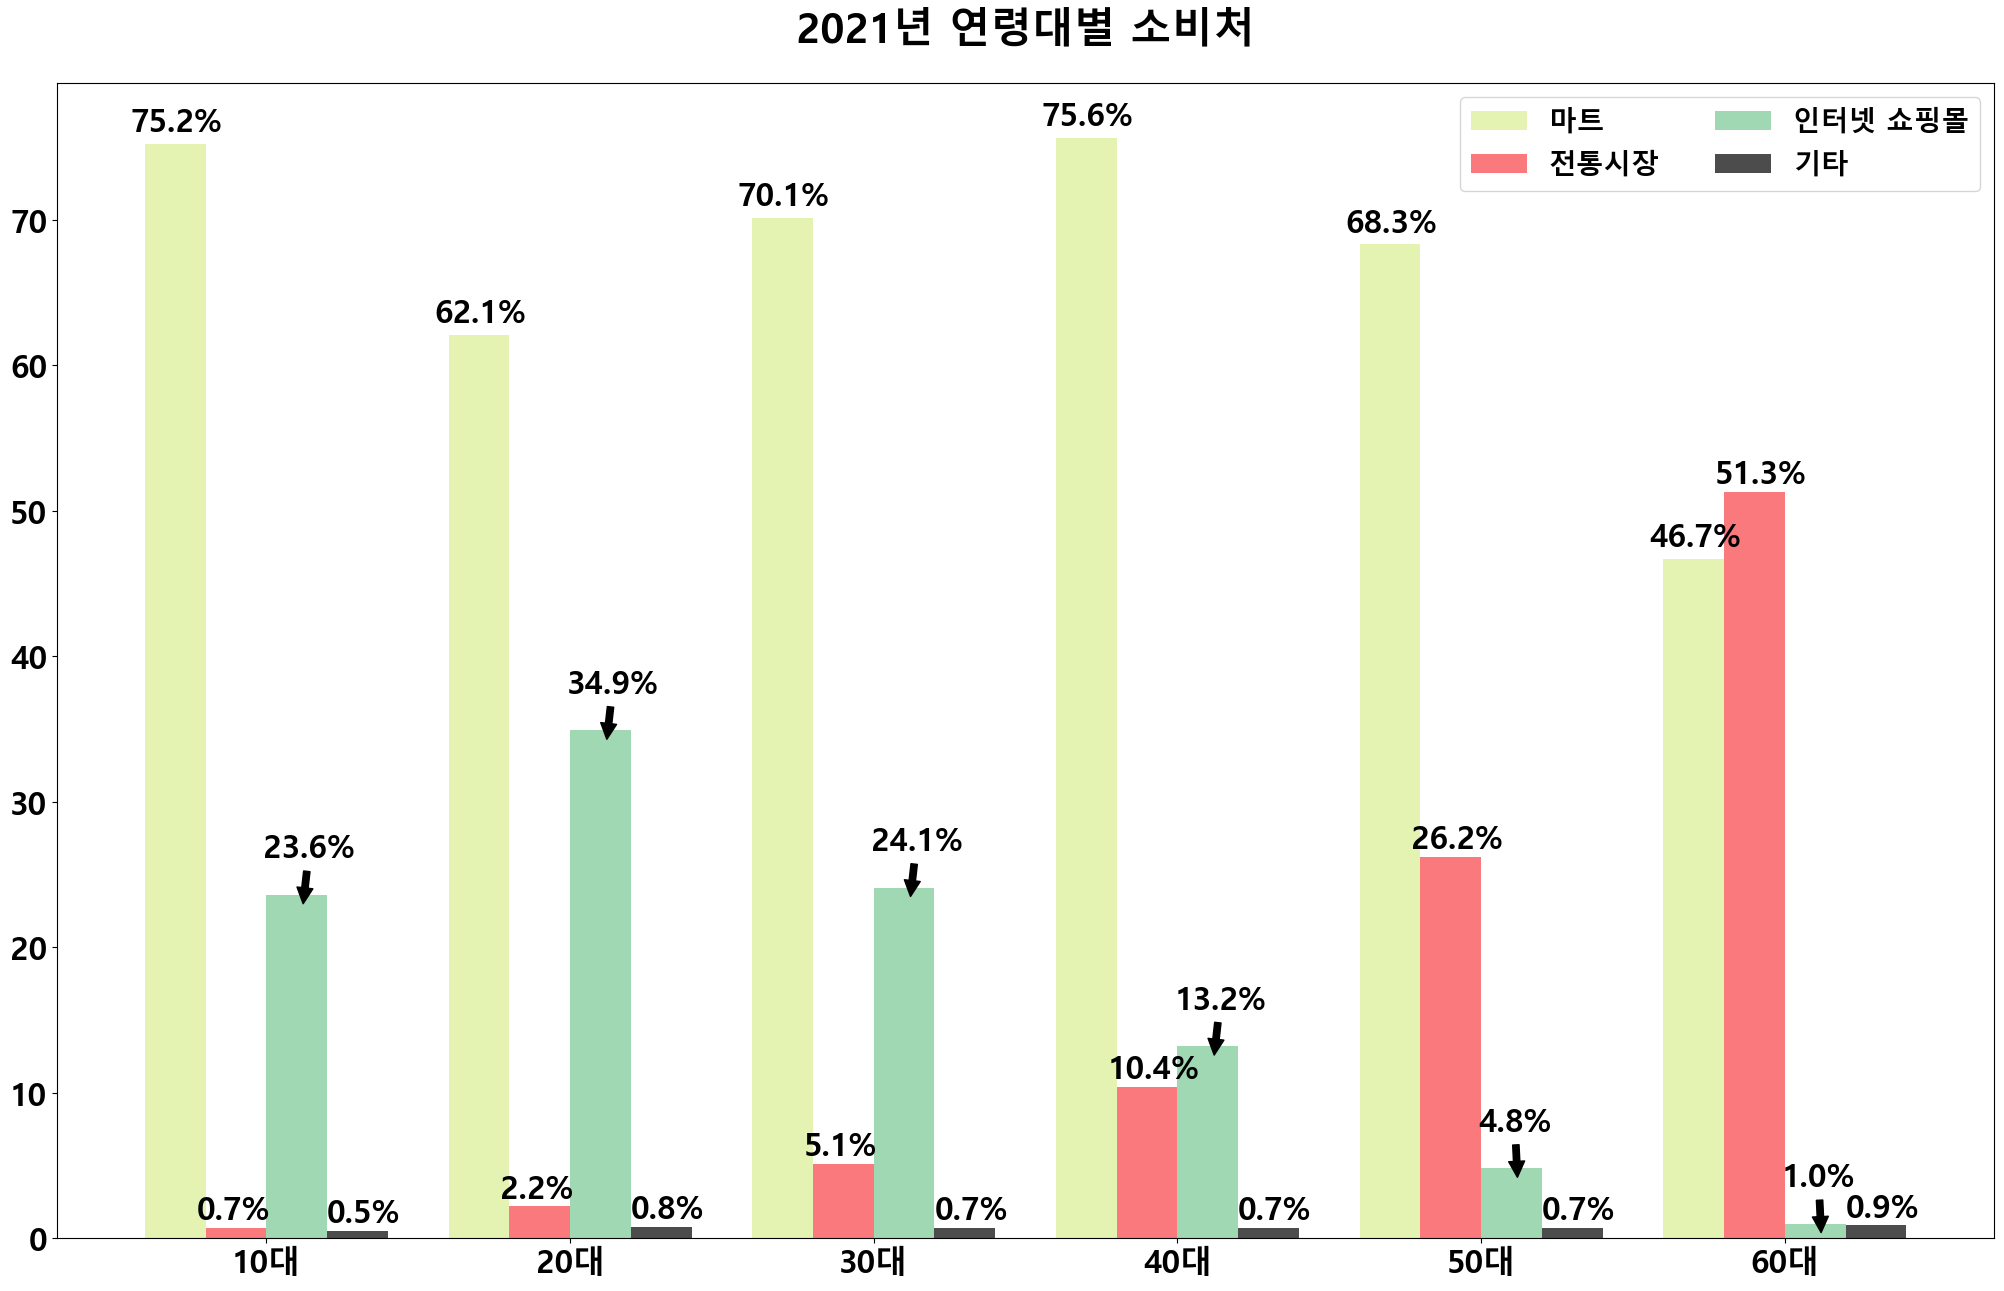

In [41]:
x = df_2021_age['연령대']
y1 = df_2021_age['마트']
y2 = df_2021_age['전통시장']
y3 = df_2021_age['인터넷 쇼핑몰']
y4 = df_2021_age['기타']

categories = ['10대', '20대', '30대', '40대', '50대', '60대']  # x의 고유한 값들 추출
x_numeric = range(len(categories))  # 고유한 값들에 대응되는 숫자 리스트 생성

bar_width = 0.2  # 막대 그래프의 폭
offset = bar_width / 4  # 막대 그래프의 폭 절반만큼 이동

p1 = plt.bar([val - offset*2 for val in x_numeric], y1, color='#d9ed92', alpha=0.7, width=bar_width, label='마트')
p2 = plt.bar([val + offset*2for val in x_numeric], y2, color='#f94144', alpha=0.7, width=bar_width, label='전통시장')
p3 = plt.bar([val + offset*6 for val in x_numeric], y3, color='#76c893', alpha=0.7, width=bar_width, label='인터넷 쇼핑몰')
p4 = plt.bar([val + 10*offset for val in x_numeric], y4, color='black', alpha=0.7, width=bar_width, label='기타')
plt.legend(ncol=2, fontsize=20, loc='upper right')

plt.gca().tick_params(axis='x', top=False, bottom=True, labelbottom=True, labeltop=False)

for i in range(len(x)):
    plt.annotate('{:,.1f}%'.format(y1[i]), xy=(x_numeric[i], y1[i]), xytext=(x_numeric[i]+0.055, y1[i] +0.3), ha='right', va='bottom')
    
for i in range(len(x)):
    plt.annotate('{:,.1f}%'.format(y2[i]), xy=(x_numeric[i], y2[i]), xytext=(x_numeric[i]-0.03, y2[i]), ha='left', va='bottom')
    
for i in range(len(x)):
    plt.annotate('{:,.1f}%'.format(y3[i]), xy=(x_numeric[i]+0.32, y3[i]-0.8), xytext=(x_numeric[i]+0.19, y3[i] + 2), ha='left', va='bottom', arrowprops=dict(arrowstyle='simple', facecolor='black'))
    
for i in range(len(x)):
    plt.annotate('{:,.1f}%'.format(y4[i]), xy=(x_numeric[i], y4[i]), xytext=(x_numeric[i]+0.4, y4[i]), ha='left', va='bottom')

plt.xticks([val + offset*4 for val in x_numeric], categories)  # 숫자로 변환된 x 좌표에 대응되는 카테고리 레이블 설정
plt.title('2021년 연령대별 소비처', pad = 30, fontsize=30)
# plt.show()

plt.savefig('2021_age.png')

## 연령대별 전통시장 및 지역화폐 이용 인구 비율

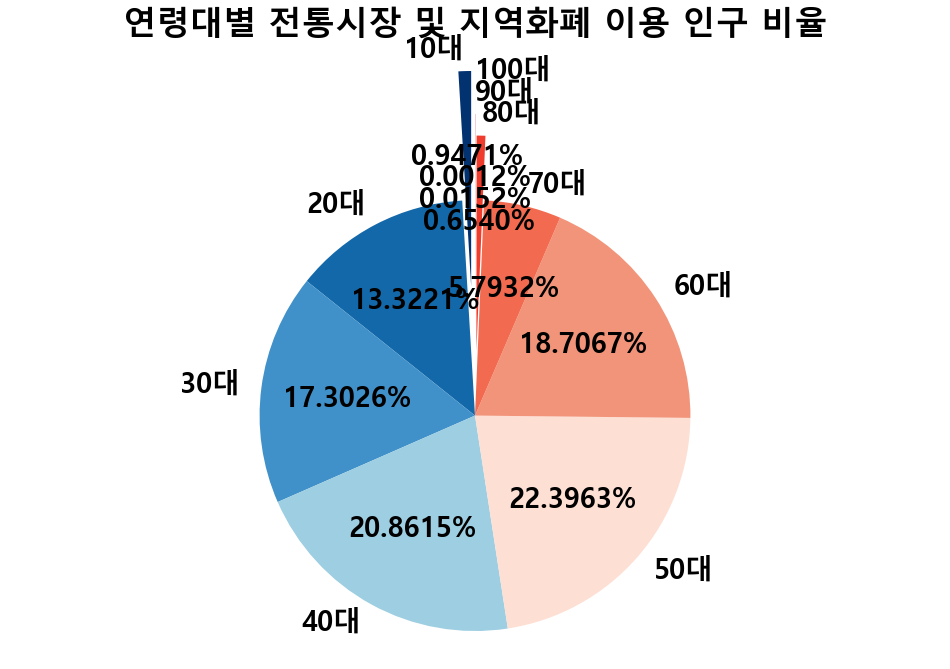

In [45]:
plt.rcParams['font.size'] = 20

labels = ['10대', '20대', '30대' ,'40대' ,'50대' ,'60대' ,'70대' ,'80대' ,'90대' ,'100대']
sizes = [0.9471, 13.3221, 17.3026, 20.8615, 22.3963, 18.7067, 5.7932, 0.6540, 0.0152, 0.0012 ]
colors = ['#033270', '#1368aa', '#4091c9', '#9dcee2', '#fedfd4', '#f29479', '#f26a4f', '#ef3c2d', '#cb1b16', '#65010c']
explode = (0.6, 0, 0, 0, 0, 0, 0, 0.3, 0.4, 0.5)
plt.figure(figsize = (12,8))
plt.title("연령대별 전통시장 및 지역화폐 이용 인구 비율")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.4f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.show()